In [1]:
import geopandas as gpd
import pandas as pd
from base import ROOT_DIR
from IPython.display import display
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

In [2]:
duvernay_folder = ROOT_DIR / "gtx/data/Duvernay/Duvernay"
duv_well_head = pd.read_excel(duvernay_folder / "Duvernay well headers SPE April 21 "
                                                 "2021 .xlsx")
duv_well_tops = pd.read_excel(duvernay_folder / "Duvernay formation tops SPE April 20 "
                                                 "2021.xlsx")
duv_prod = pd.read_excel(duvernay_folder / "SPE Duvernay production summary April 20 "
                                           "2021.xlsx")

print("----- Well headers -----")
display(duv_well_head.head())

----- Well headers -----


,UWI,Elevation Meters,ElevationDatum,TD meters,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,BottomLatitude_NAD83,BottomLongitude_NAD83,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27
0,100072507623W500,555.7,KB,2545.0,55.613640,-117.423800,55.613640,-117.423800,55.613640,-117.423800,55.613640,-117.423800
1,100062007823W500,560.9,KB,2430.0,55.770872,-117.537674,55.770872,-117.537674,55.770872,-117.537674,55.770872,-117.537674
2,100052107723W500,558.4,KB,2515.5,55.683723,-117.516168,55.683723,-117.516168,55.683723,-117.516168,55.683723,-117.516168
3,100061307518W500,631.4,KB,2411.0,55.494600,-116.653606,55.494600,-116.653606,55.494600,-116.653606,55.494600,-116.653606
4,100070907618W500,627.0,KB,2408.0,55.566965,-116.726243,55.566965,-116.726243,55.566965,-116.726243,55.566965,-116.726243


In [3]:
duv_well_head.columns

Index(['UWI ', 'Elevation Meters', 'ElevationDatum', 'TD meters ',
       'SurfaceLatitude_NAD83', 'SurfaceLongitude_NAD83',
       'BottomLatitude_NAD83', 'BottomLongitude_NAD83',
       'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27'],
      dtype='object')

In [4]:
# Useful cols
td_col = "TD"
uwi_col = "UWI"
kb_col = "KB"
useful_cols = ["TD meters ", "Elevation Meters", "UWI "]
lon_col = "SurfaceLongitude_NAD83"
lat_col = "SurfaceLatitude_NAD83"
geometry = gpd.points_from_xy(duv_well_head[lon_col], duv_well_head[lat_col])
duv_well_head.drop([lat_col, lon_col], axis=1, inplace=True)

gdf_wh = gpd.GeoDataFrame(duv_well_head[useful_cols],
                          crs="epsg:4269",
                          geometry=geometry)
gdf_wh.rename(columns={"UWI ": uwi_col,
                       "TD meters ": td_col,
                       "Elevation Meters": kb_col}, inplace=True)
display(gdf_wh.head())

,TD,KB,UWI,geometry
0,2545.0,555.7,100072507623W500,POINT (-117.42380 55.61364)
1,2430.0,560.9,100062007823W500,POINT (-117.53767 55.77087)
2,2515.5,558.4,100052107723W500,POINT (-117.51617 55.68372)
3,2411.0,631.4,100061307518W500,POINT (-116.65361 55.49460)
4,2408.0,627.0,100070907618W500,POINT (-116.72624 55.56697)


### Convert well head to feet

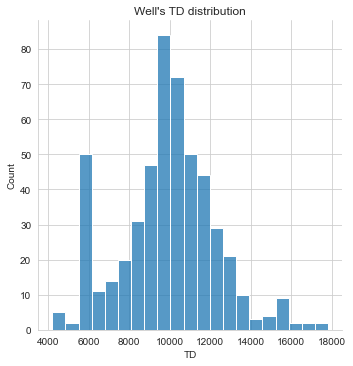

Conversion finished successfully


In [5]:
M_2_FT = 3.28084
gdf_wh[td_col] = gdf_wh[td_col] * M_2_FT
gdf_wh[kb_col] = gdf_wh[kb_col] * M_2_FT
sns.displot(data=gdf_wh, x=td_col)
plt.title("Well's TD distribution")
plt.show()
print("Conversion finished successfully")

### 2 - Process Well Tops

In [6]:
display(duv_well_tops.head())
print(duv_well_tops.columns)

,UWI,Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W),Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W),Elevation(m above sea level),01_Battle (Surbiton)[SSTVD] (m),02_Lea_Park (Surbiton)[SSTVD] (m),03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m),04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m),05_Fish_scales (Surbiton)[SSTVD] (m),06_Mannville_Top (Surbiton)[SSTVD] (m),...,08_Jurassic_Top (Surbiton)[SSTVD] (m),09_Montney_Top (Surbiton)[SSTVD] (m),10_Permian_Top (Surbiton)[SSTVD] (m),11_Wabamun (Surbiton)[SSTVD] (m),12_Winterburn (Surbiton)[SSTVD] (m),13_Woodbend (Surbiton)[SSTVD] (m),14_Duvernay_Top (Surbiton)[SSTVD] (m),15_Beaverhill (Surbiton)[SSTVD] (m),16_Elk_Point (Surbiton)[SSTVD] (m),17_Precambrian Basement (Surbiton)[SSTVD] (m)
0,100010107020W500,506245.60,6097691.89,701.0,NaN,NaN,189.50,-3.4,-214.00,-307.0,...,-627.3,-713.3,NaN,-1271.1,-1508.8,-1605.1,-1900.50,-1937.3,-2044.3,NaN
1,100010608109W500,600487.16,6205637.53,645.6,NaN,NaN,NaN,NaN,390.30,342.5,...,NaN,NaN,NaN,-206.4,-483.9,-604.7,-842.77,-895.4,-1042.5,-1078.4
2,100010904012W500,591372.37,5808846.49,1283.8,NaN,-1081.79,-1265.89,-1741.2,-1984.70,-2034.7,...,-2335.2,NaN,NaN,-2735.2,-3011.2,-3082.2,-3293.20,-3340.2,-3504.7,NaN
3,100011206021W400,760983.75,6009309.66,651.6,NaN,464.00,323.30,190.1,91.10,35.6,...,NaN,NaN,NaN,NaN,-168.4,-246.4,-422.40,-579.4,-811.4,NaN
4,100011506915W500,552047.78,6091428.82,873.1,NaN,293.98,223.10,NaN,-129.94,-213.7,...,NaN,NaN,NaN,-919.8,-1164.7,-1279.7,-1557.30,-1602.2,-1744.9,NaN


Index(['UWI', 'Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)',
       'Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)',
       'Elevation(m above sea level)', '01_Battle (Surbiton)[SSTVD] (m)',
       '02_Lea_Park (Surbiton)[SSTVD] (m)',
       '03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m)',
       '04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m)',
       '05_Fish_scales (Surbiton)[SSTVD] (m)',
       '06_Mannville_Top (Surbiton)[SSTVD] (m)',
       '07_Ostracod_Beds (Surbiton)[SSTVD] (m)',
       '08_Jurassic_Top (Surbiton)[SSTVD] (m)',
       '09_Montney_Top (Surbiton)[SSTVD] (m)',
       '10_Permian_Top (Surbiton)[SSTVD] (m)',
       '11_Wabamun (Surbiton)[SSTVD] (m)',
       '12_Winterburn (Surbiton)[SSTVD] (m)',
       '13_Woodbend (Surbiton)[SSTVD] (m)',
       '14_Duvernay_Top (Surbiton)[SSTVD] (m)',
       '15_Beaverhill (Surbiton)[SSTVD] (m)',
       '16_Elk_Point (Surbiton)[SSTVD] (m)',
       '17_Precambrian Basement (Surbiton)[SSTVD] (m)'],
     

In [7]:
top_sstvd_col = "top_sstvd"
top_md_col = "top_md"
formation_col = "formation"
df_tops: pd.DataFrame = (duv_well_tops.set_index(uwi_col)
                             .loc[:, "01_Battle (Surbiton)[SSTVD] (m)":])
# Converting from wide format to tidy format
df_tops = df_tops.reset_index().melt(id_vars=uwi_col,
                                     var_name=formation_col,
                                     value_name=top_sstvd_col)
# Extracting the actual formation name
df_tops[formation_col] = df_tops[formation_col].str.extract(r"\d{2}_(.\S+)")
# Convert top_sstvd_col column to feet and from negative to positive
df_tops[top_sstvd_col] = df_tops[top_sstvd_col] * M_2_FT
print(df_tops[formation_col].unique())
display(df_tops.head())
print(df_tops.info())
print(df_tops[formation_col].unique())

['Battle' 'Lea_Park' '1st_White_Speckled_Shale' '2nd_White_Speckled_Shale'
 'Fish_scales' 'Mannville_Top' 'Ostracod_Beds' 'Jurassic_Top'
 'Montney_Top' 'Permian_Top' 'Wabamun' 'Winterburn' 'Woodbend'
 'Duvernay_Top' 'Beaverhill' 'Elk_Point' 'Precambrian']


,UWI,formation,top_sstvd
0,100010107020W500,Battle,NaN
1,100010608109W500,Battle,NaN
2,100010904012W500,Battle,NaN
3,100011206021W400,Battle,NaN
4,100011506915W500,Battle,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        8704 non-null   object 
 1   formation  8704 non-null   object 
 2   top_sstvd  6484 non-null   float64
dtypes: float64(1), object(2)
memory usage: 204.1+ KB
None
['Battle' 'Lea_Park' '1st_White_Speckled_Shale' '2nd_White_Speckled_Shale'
 'Fish_scales' 'Mannville_Top' 'Ostracod_Beds' 'Jurassic_Top'
 'Montney_Top' 'Permian_Top' 'Wabamun' 'Winterburn' 'Woodbend'
 'Duvernay_Top' 'Beaverhill' 'Elk_Point' 'Precambrian']


### 2.1 - Eliminate nan values

In [8]:
# Replace zero values with nan
df_tops.dropna(inplace=True)
print(df_tops.info())
display(df_tops.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 5 to 8682
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        6484 non-null   object 
 1   formation  6484 non-null   object 
 2   top_sstvd  6484 non-null   float64
dtypes: float64(1), object(2)
memory usage: 202.6+ KB
None


,UWI,formation,top_sstvd
5,100011804403W500,Battle,2029.527624
92,100041903905W500,Battle,1435.039416
128,100060505514W500,Battle,1984.416074
131,100060605514W500,Battle,1446.522356
139,100061004119W400,Battle,1911.253342


### 2.2 - Merge with well header data
To get the elevation, so we can have the SSTVD

In [9]:
df_tops = gpd.GeoDataFrame(df_tops.merge(gdf_wh[[uwi_col, kb_col, "geometry"]],
                                         on=uwi_col))
df_tops[top_md_col] = -(df_tops[top_sstvd_col] - df_tops[kb_col])
df_tops.head()

,UWI,formation,top_sstvd,KB,geometry,top_md
0,100011804403W500,Battle,2029.527624,3106.627396,POINT (-114.41562 52.78733),1077.099772
1,100011804403W500,Lea_Park,-810.695564,3106.627396,POINT (-114.41562 52.78733),3917.322960
2,100011804403W500,1st_White_Speckled_Shale,-1229.002664,3106.627396,POINT (-114.41562 52.78733),4335.630060
3,100011804403W500,2nd_White_Speckled_Shale,-2114.829464,3106.627396,POINT (-114.41562 52.78733),5221.456860
4,100011804403W500,Fish_scales,-2579.429216,3106.627396,POINT (-114.41562 52.78733),5686.056612


In [10]:
formations = df_tops[formation_col].unique()
formations

array(['Battle', 'Lea_Park', '1st_White_Speckled_Shale',
       '2nd_White_Speckled_Shale', 'Fish_scales', 'Mannville_Top',
       'Wabamun', 'Winterburn', 'Woodbend', 'Duvernay_Top', 'Beaverhill',
       'Jurassic_Top', 'Elk_Point', 'Ostracod_Beds', 'Montney_Top',
       'Precambrian', 'Permian_Top'], dtype=object)

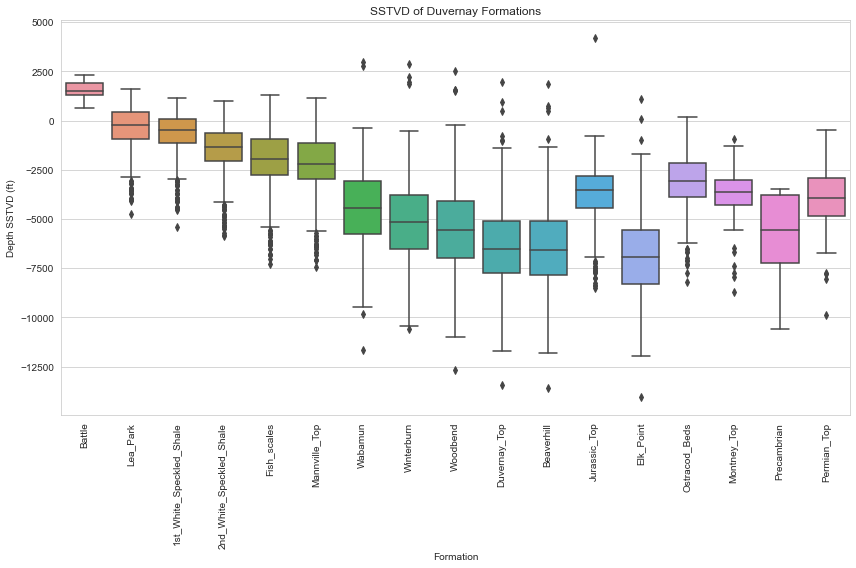

In [11]:
fig_3, ax_3 = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(x=formation_col, y=top_sstvd_col, data=df_tops, ax=ax_3, order=formations)
plt.title("SSTVD of Duvernay Formations")
plt.ylabel("Depth SSTVD (ft)")
plt.xlabel("Formation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 2.3 - Save Well tops to geopackage

In [12]:
gpkg_file_name = "duv.gpkg"
gpkg_save_path = ROOT_DIR / "gtx/eda_duv_oc" / gpkg_file_name
df_tops.to_file(gpkg_save_path, layer="well_tops", driver='GPKG')

## 3 - Process True Temp data with formation tops

### 3.1 - Load the True Temp data

In [13]:
duv_true_temp = pd.read_excel(duvernay_folder / "Duvenay TrueTemp_Train.xlsx")
duv_true_temp.head()

,UWI,Depths subsea (m),True Temperature (oC)
0,100010107020W500,-720,2.53
1,100010107020W500,-700,2.54
2,100010107020W500,-680,2.54
3,100010107020W500,-660,3.30
4,100010107020W500,-640,4.06


In [14]:
duv_true_temp.columns

Index(['UWI', 'Depths subsea (m)', 'True Temperature (oC)'], dtype='object')

### 3.2 - Convert depth to ft and temperature to Farenheit

In [15]:
# Rename cols
sstvd_col = "SSTVD"
true_temp_col = "TRUE_TEMP"
duv_true_temp.rename(columns={"Depths subsea (m)": sstvd_col,
                              "True Temperature (oC)": true_temp_col}, inplace=True)
# Convert sstvd meters to ft
duv_true_temp[sstvd_col] = duv_true_temp[sstvd_col] * M_2_FT
duv_true_temp[true_temp_col] = duv_true_temp[true_temp_col] * 1.8 + 32
display(duv_true_temp.head())

,UWI,SSTVD,TRUE_TEMP
0,100010107020W500,-2362.2048,36.554
1,100010107020W500,-2296.5880,36.572
2,100010107020W500,-2230.9712,36.572
3,100010107020W500,-2165.3544,37.940
4,100010107020W500,-2099.7376,39.308


In [16]:
df_tt_ml = duv_true_temp.copy()

### 3.3 - Merge TT with well header data

In [17]:
#Get MD values by merging with well header data
md_col = "MD"
df_true_temp = duv_true_temp.merge(gdf_wh[[uwi_col, kb_col]], how="inner", on=uwi_col)
df_true_temp[md_col] = df_true_temp[sstvd_col] + df_true_temp[kb_col]
display(df_true_temp)


,UWI,SSTVD,TRUE_TEMP,KB,MD
0,100010107020W500,-2362.2048,36.554,2300.175536,-62.029264
1,100010107020W500,-2296.5880,36.572,2300.175536,3.587536
2,100010107020W500,-2230.9712,36.572,2300.175536,69.204336
3,100010107020W500,-2165.3544,37.940,2300.175536,134.821136
4,100010107020W500,-2099.7376,39.308,2300.175536,200.437936
...,...,...,...,...,...
60154,106141105522W400,5118.1104,188.222,2076.668196,7194.778596
60155,106141105522W400,5183.7272,189.554,2076.668196,7260.395396
60156,106141105522W400,5249.3440,190.886,2076.668196,7326.012196
60157,106141105522W400,5314.9608,192.218,2076.668196,7391.628996


### 3.4 - Assign formation names to depths

In [18]:
gr_tops = df_tops.groupby(uwi_col)
df_tt = pd.DataFrame()
for name, group in gr_tops:
    well_cond = df_true_temp[uwi_col] == name
    for row in group.itertuples(index=False):
        md_top = getattr(row, top_md_col)
        formation_name = getattr(row, formation_col)
        formation_cond = df_true_temp[md_col] >= md_top
        if sum(formation_cond) >= 1:
            df_true_temp.loc[formation_cond & well_cond, formation_col] = formation_name

df_true_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60159 entries, 0 to 60158
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        60159 non-null  object 
 1   SSTVD      60159 non-null  float64
 2   TRUE_TEMP  60159 non-null  float64
 3   KB         60159 non-null  float64
 4   MD         60159 non-null  float64
 5   formation  43800 non-null  object 
dtypes: float64(4), object(2)
memory usage: 3.2+ MB


In [19]:
display(df_true_temp.head())
display(df_true_temp.tail())
df_true_temp.columns

,UWI,SSTVD,TRUE_TEMP,KB,MD,formation
0,100010107020W500,-2362.2048,36.554,2300.175536,-62.029264,NaN
1,100010107020W500,-2296.5880,36.572,2300.175536,3.587536,NaN
2,100010107020W500,-2230.9712,36.572,2300.175536,69.204336,NaN
3,100010107020W500,-2165.3544,37.940,2300.175536,134.821136,NaN
4,100010107020W500,-2099.7376,39.308,2300.175536,200.437936,NaN


,UWI,SSTVD,TRUE_TEMP,KB,MD,formation
60154,106141105522W400,5118.1104,188.222,2076.668196,7194.778596,Elk_Point
60155,106141105522W400,5183.7272,189.554,2076.668196,7260.395396,Elk_Point
60156,106141105522W400,5249.3440,190.886,2076.668196,7326.012196,Elk_Point
60157,106141105522W400,5314.9608,192.218,2076.668196,7391.628996,Elk_Point
60158,106141105522W400,5380.5776,191.750,2076.668196,7457.245796,Elk_Point


Index(['UWI', 'SSTVD', 'TRUE_TEMP', 'KB', 'MD', 'formation'], dtype='object')

### 3.5 - Aggregate depth and temperature per formation and well

In [20]:
df_form_temp = (df_true_temp
                .groupby([uwi_col, formation_col])[[sstvd_col, true_temp_col]]
                .mean())
df_form_temp.reset_index(inplace=True)
df_form_temp.head(10)

,UWI,formation,SSTVD,TRUE_TEMP
0,100010107020W500,1st_White_Speckled_Shale,-295.2756,79.808000
1,100010107020W500,2nd_White_Speckled_Shale,360.8924,95.639000
2,100010107020W500,Beaverhill,6528.8716,199.178000
3,100010107020W500,Duvernay_Top,6299.2128,194.972000
4,100010107020W500,Elk_Point,6922.5724,205.550000
5,100010107020W500,Fish_scales,853.0184,107.582000
6,100010107020W500,Jurassic_Top,2198.1628,138.501500
7,100010107020W500,Mannville_Top,1509.1864,122.994800
8,100010107020W500,Montney_Top,3248.0316,154.218714
9,100010107020W500,Ostracod_Beds,2034.1208,134.816000


### 3.6 - Merge with well header geodataframe

In [21]:
# Cast to GeoDataFrame
gdf_form_temp = gpd.GeoDataFrame(df_form_temp
                                 .merge(gdf_wh[[uwi_col, "geometry"]],
                                        how="left",
                                        on=uwi_col))
display(gdf_form_temp.head())
print(gdf_form_temp.info())

,UWI,formation,SSTVD,TRUE_TEMP,geometry
0,100010107020W500,1st_White_Speckled_Shale,-295.2756,79.808,POINT (-116.90355 55.02798)
1,100010107020W500,2nd_White_Speckled_Shale,360.8924,95.639,POINT (-116.90355 55.02798)
2,100010107020W500,Beaverhill,6528.8716,199.178,POINT (-116.90355 55.02798)
3,100010107020W500,Duvernay_Top,6299.2128,194.972,POINT (-116.90355 55.02798)
4,100010107020W500,Elk_Point,6922.5724,205.550,POINT (-116.90355 55.02798)


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4714 entries, 0 to 4713
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   UWI        4714 non-null   object  
 1   formation  4714 non-null   object  
 2   SSTVD      4714 non-null   float64 
 3   TRUE_TEMP  4714 non-null   float64 
 4   geometry   4714 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 221.0+ KB
None


### 3.7 - Save to Geopackage

In [22]:
gdf_form_temp.to_file(gpkg_save_path, layer="tops_temperature", driver='GPKG')

In [23]:
gdf_form_temp[formation_col].unique()


array(['1st_White_Speckled_Shale', '2nd_White_Speckled_Shale',
       'Beaverhill', 'Duvernay_Top', 'Elk_Point', 'Fish_scales',
       'Jurassic_Top', 'Mannville_Top', 'Montney_Top', 'Ostracod_Beds',
       'Wabamun', 'Winterburn', 'Woodbend', 'Precambrian', 'Lea_Park',
       'Battle', 'Permian_Top'], dtype=object)

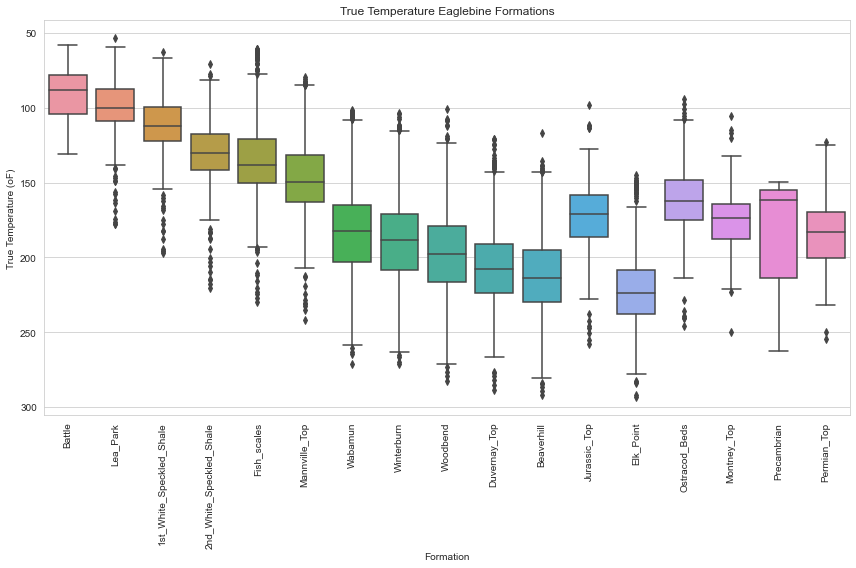

In [24]:
fig_4, ax_4 = plt.subplots(1, 1, figsize=(12, 8))
sns.boxplot(x=formation_col, y=true_temp_col, data=gdf_form_temp, ax=ax_4,
            order=formations)
plt.title("True Temperature Eaglebine Formations")
plt.ylabel("True Temperature (oF)")
plt.xlabel("Formation")
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

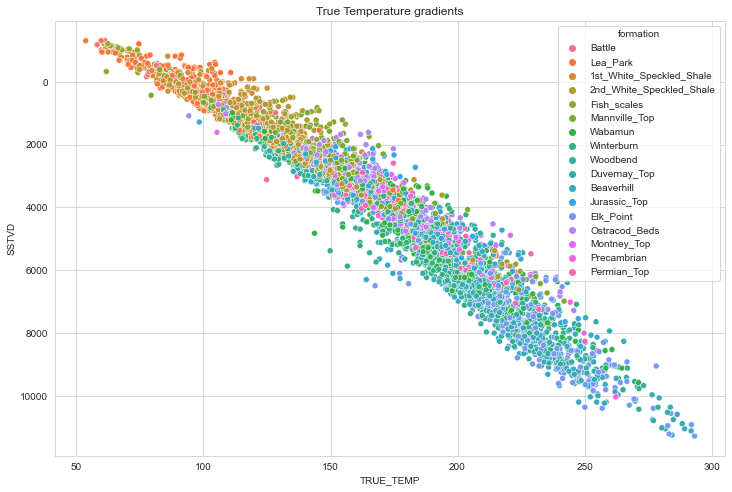

In [25]:
fig_5, ax_5 = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(x=true_temp_col, y=sstvd_col,
                hue=formation_col, data=gdf_form_temp, hue_order=formations, ax=ax_5)
plt.title("True Temperature gradients")
plt.gca().invert_yaxis()
plt.show()

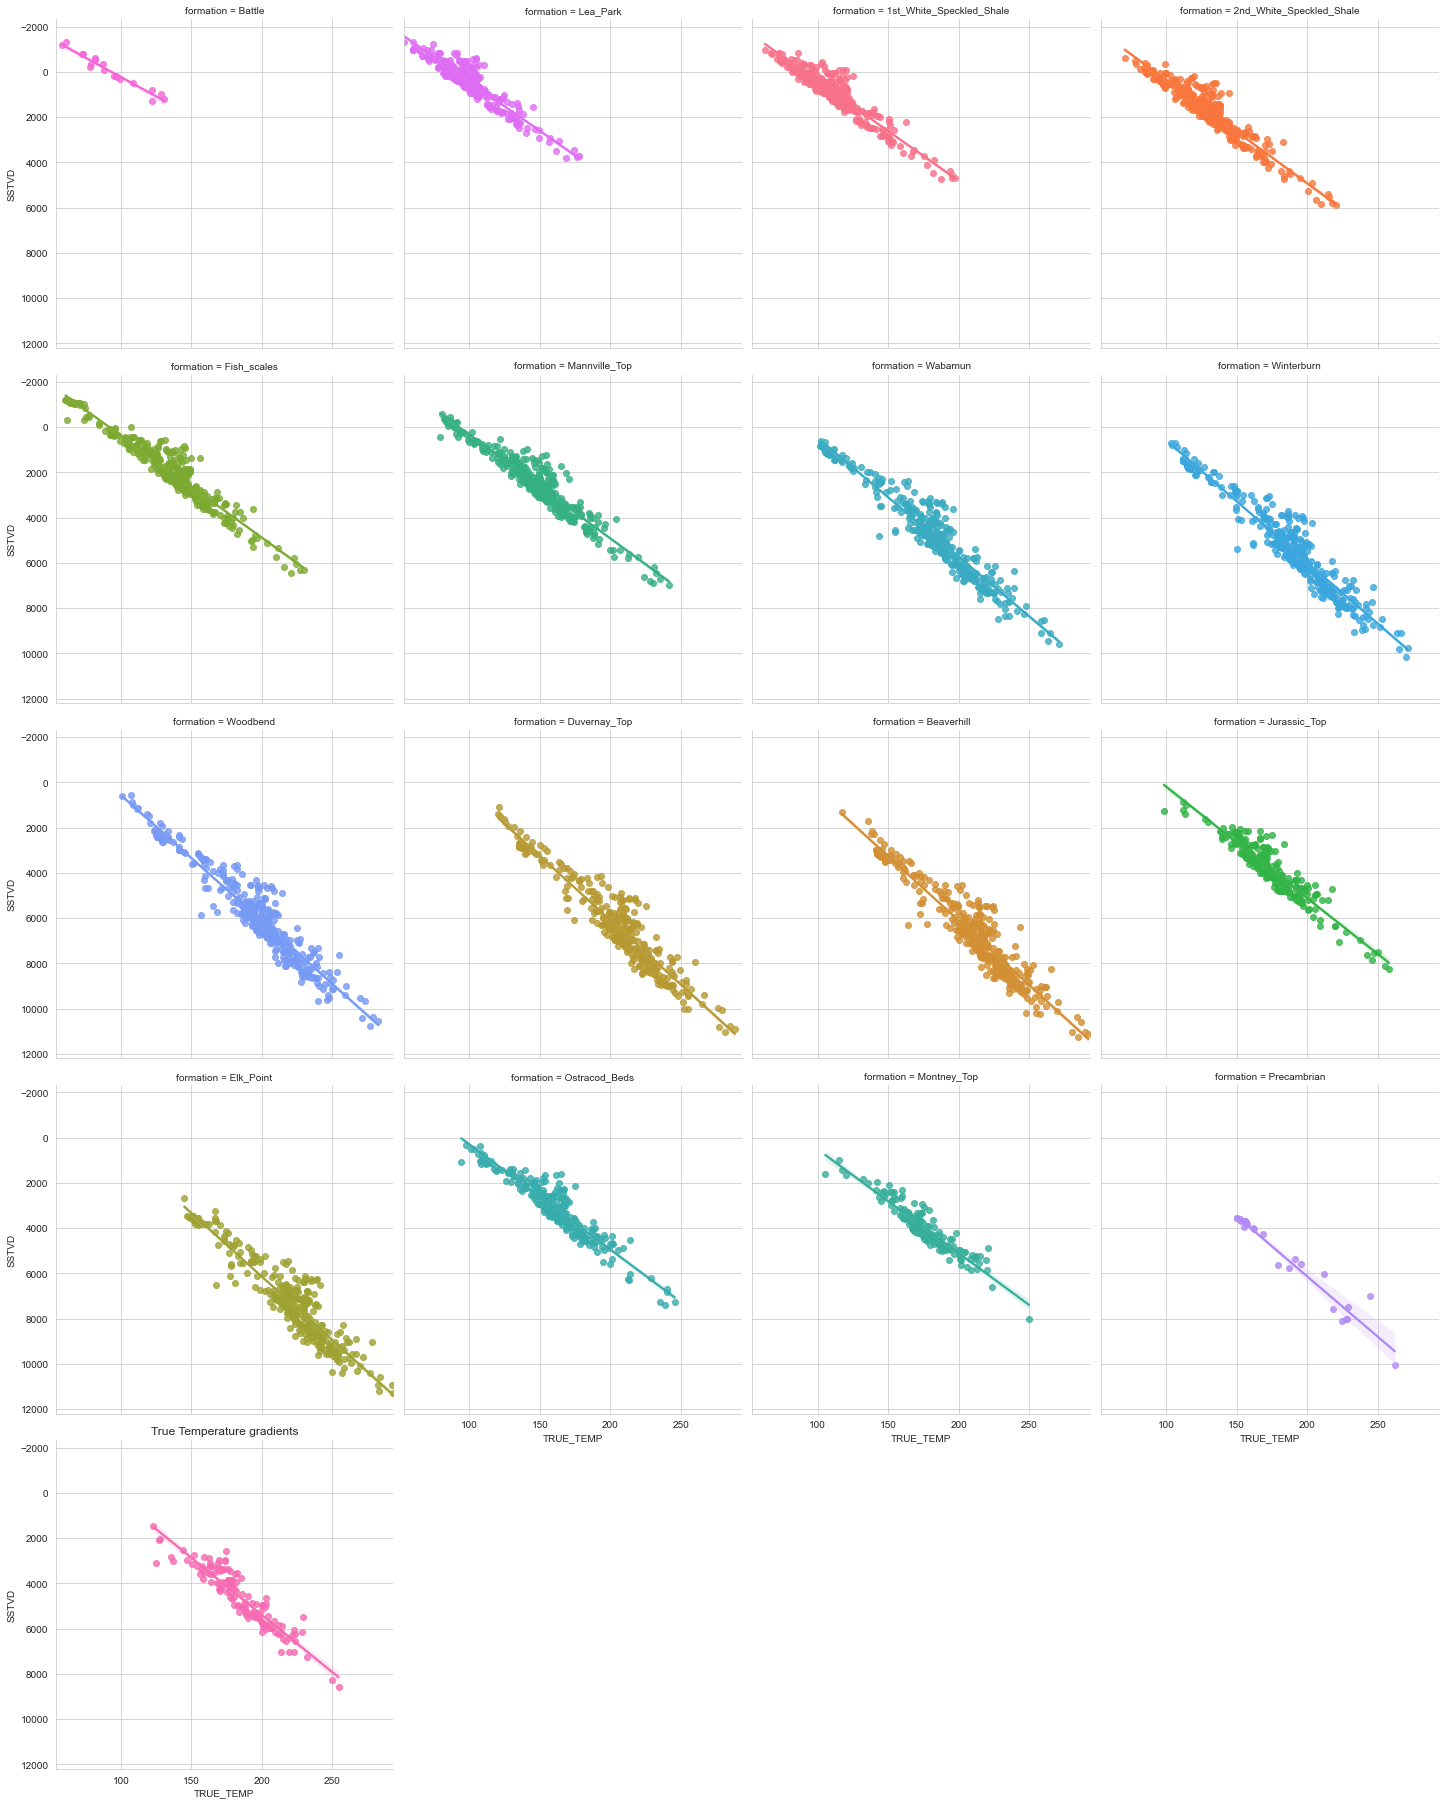

In [26]:
g = sns.lmplot(x=true_temp_col, y=sstvd_col, hue=formation_col, data=gdf_form_temp,
               col=formation_col, col_wrap=4, col_order=formations, fit_reg=True)
plt.title("True Temperature gradients")
plt.gca().invert_yaxis()
plt.savefig("gradients.png")
plt.show()

## 4 - Create dataset for machine learning

In [27]:
df_tt = gpd.GeoDataFrame(df_tt_ml.merge(gdf_wh, how="inner", on=uwi_col))
display(df_tt.head())
df_tt.info()

,UWI,SSTVD,TRUE_TEMP,TD,KB,geometry
0,100010107020W500,-2362.2048,36.554,9080.298191,2300.175536,POINT (-116.90355 55.02798)
1,100010107020W500,-2296.5880,36.572,9080.298191,2300.175536,POINT (-116.90355 55.02798)
2,100010107020W500,-2230.9712,36.572,9080.298191,2300.175536,POINT (-116.90355 55.02798)
3,100010107020W500,-2165.3544,37.940,9080.298191,2300.175536,POINT (-116.90355 55.02798)
4,100010107020W500,-2099.7376,39.308,9080.298191,2300.175536,POINT (-116.90355 55.02798)


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 60159 entries, 0 to 60158
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   UWI        60159 non-null  object  
 1   SSTVD      60159 non-null  float64 
 2   TRUE_TEMP  60159 non-null  float64 
 3   TD         60159 non-null  float64 
 4   KB         60159 non-null  float64 
 5   geometry   60159 non-null  geometry
dtypes: float64(4), geometry(1), object(1)
memory usage: 3.2+ MB


### 4.1 - Transform to NAD27 Zone 11

In [28]:
df_tt = df_tt.to_crs(epsg=26711)
display(df_tt.head())

,UWI,SSTVD,TRUE_TEMP,TD,KB,geometry
0,100010107020W500,-2362.2048,36.554,9080.298191,2300.175536,POINT (506233.853 6097692.519)
1,100010107020W500,-2296.5880,36.572,9080.298191,2300.175536,POINT (506233.853 6097692.519)
2,100010107020W500,-2230.9712,36.572,9080.298191,2300.175536,POINT (506233.853 6097692.519)
3,100010107020W500,-2165.3544,37.940,9080.298191,2300.175536,POINT (506233.853 6097692.519)
4,100010107020W500,-2099.7376,39.308,9080.298191,2300.175536,POINT (506233.853 6097692.519)


### 4.2 - Transform to x and Y columns the geometry

In [29]:
x_col, y_col = "X", "Y"

In [30]:
df_tt[x_col] = df_tt["geometry"].x
df_tt[y_col] = df_tt["geometry"].y

In [31]:
df_tt.drop(["geometry", td_col, kb_col], axis=1, inplace=True)
df_tt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 60159 entries, 0 to 60158
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        60159 non-null  object 
 1   SSTVD      60159 non-null  float64
 2   TRUE_TEMP  60159 non-null  float64
 3   X          60159 non-null  float64
 4   Y          60159 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.8+ MB


### 4.3 - Save to csv

In [32]:
tt_ml_file_name = "dataset_duv.csv"
df_tt.to_csv(ROOT_DIR / "gtx/ml_duv" / tt_ml_file_name, index=False)

## 5 - Process contest data for prediction

In [33]:
df_contest = pd.read_csv(ROOT_DIR / "gtx/data/set_assign.csv")
df_contest.head()

,UWI,Set
0,42021301990000,Validation_Testing
1,100102606420W500,Validation_Testing
2,100141705519W500,Validation_Testing
3,100141503621W400,Validation_Testing
4,100043406718W500,Validation_Testing


In [34]:
cond_test = df_contest["Set"] == "Validation_Testing"
df_cont_duv = gpd.GeoDataFrame(df_contest[cond_test].merge(gdf_wh,
                                                           how="inner",
                                                           on=uwi_col))
df_cont_duv[sstvd_col] = df_cont_duv[td_col] - df_cont_duv[kb_col]
df_cont_duv[x_col] = df_cont_duv["geometry"].x
df_cont_duv[y_col] = df_cont_duv["geometry"].y
df_cont_duv.drop(["Set", td_col, kb_col, "geometry"], axis=1, inplace=True)
df_cont_duv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UWI     127 non-null    object 
 1   SSTVD   127 non-null    float64
 2   X       127 non-null    float64
 3   Y       127 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.0+ KB


In [35]:
test_file_name = "test_duv.csv"
df_cont_duv.to_csv(ROOT_DIR / "gtx/ml_duv" / test_file_name, index=False)